# 1. Initial data inspection and data cleaning

## a. Examine the data initially to identify duplicates, missing values, irrelevant entries, or outliers. Check for any instances of erroneous entries and rectify them as needed

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('rolling_stones_spotify.csv')

In [3]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [4]:
df = df.drop(['Unnamed: 0'],axis=1) # removing irrelevant column

In [5]:
df.shape

(1610, 17)

In [6]:
# Initial inspection
print(df.info()) 
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


In [7]:
df.duplicated().sum() #No duplicate entries

0

In [8]:
df.isnull().sum() #No missing values

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [9]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   id                1610 non-null   object        
 5   uri               1610 non-null   object        
 6   acousticness      1610 non-null   float64       
 7   danceability      1610 non-null   float64       
 8   energy            1610 non-null   float64       
 9   instrumentalness  1610 non-null   float64       
 10  liveness          1610 non-null   float64       
 11  loudness          1610 non-null   float64       
 12  speechiness       1610 non-null   float64       
 13  tempo             1610 non-null   float64       
 14  valence           1610 n

# 2. Refine the data for further processing based on your findings

In [11]:
df.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [12]:
# Normalize numerical features
numeric_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms']
ss = StandardScaler()
df[numeric_cols] = ss.fit_transform(df[numeric_cols])

In [13]:
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,-0.739355,-0.041343,1.115764,3.012099,1.261552,-1.985045,0.784410,-0.276517,-2.387590,0.982999,-1.930719
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.820518,-1.007963,0.960062,0.249238,1.344648,0.724545,0.123753,0.183852,-1.142678,1.063495,-0.042138
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.728140,-0.584626,0.982305,0.853953,1.330321,0.680109,0.881280,0.136323,-1.164306,1.063495,0.050079
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,1.392383,-0.704571,1.071278,-0.594080,1.155532,0.479980,2.392459,0.236514,-1.882359,0.902504,0.444539
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.657756,-1.170242,0.982305,-0.392050,1.358975,0.625984,0.455050,0.152303,-1.627147,0.902504,0.437392


In [14]:
# Remove outliers based on Z-score
df = df[(np.abs(stats.zscore(df[numeric_cols])) < 3).all(axis=1)]

In [15]:
df.head() # For example, Row Number 0 is removed because of outlier z-score

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.820518,-1.007963,0.960062,0.249238,1.344648,0.724545,0.123753,0.183852,-1.142678,1.063495,-0.042138
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.728140,-0.584626,0.982305,0.853953,1.330321,0.680109,0.881280,0.136323,-1.164306,1.063495,0.050079
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,1.392383,-0.704571,1.071278,-0.594080,1.155532,0.479980,2.392459,0.236514,-1.882359,0.902504,0.444539
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.657756,-1.170242,0.982305,-0.392050,1.358975,0.625984,0.455050,0.152303,-1.627147,0.902504,0.437392
5,Monkey Man - Live,Licked Live In NYC,2022-06-10,6,3ixZ1NQk5sqvBZgWeIdiqr,spotify:track:3ixZ1NQk5sqvBZgWeIdiqr,0.107886,-0.909184,0.910014,-0.141836,0.714260,0.478644,0.425989,-0.836768,-1.977522,0.822008,-0.124132


# 3. Perform exploratory data analysis and feature engineering

## a. Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

In [16]:
# Group by album and calculate the mean popularity
album_popularity = df.groupby('album')['popularity'].mean().sort_values(ascending=False)
album_popularity

album
Sticky Fingers (Remastered)                   2.178938
Exile On Main Street (2010 Re-Mastered)       1.792693
Some Girls                                    1.747710
Tattoo You (2009 Re-Mastered)                 1.689574
Beggars Banquet (50th Anniversary Edition)    1.582246
                                                ...   
On Air                                       -1.373740
Now!                                         -1.378212
Out Of Our Heads (UK Sequence)               -1.465416
Got Live if you want it!                     -1.619700
England's Newest Hit Makers                  -1.626408
Name: popularity, Length: 90, dtype: float64

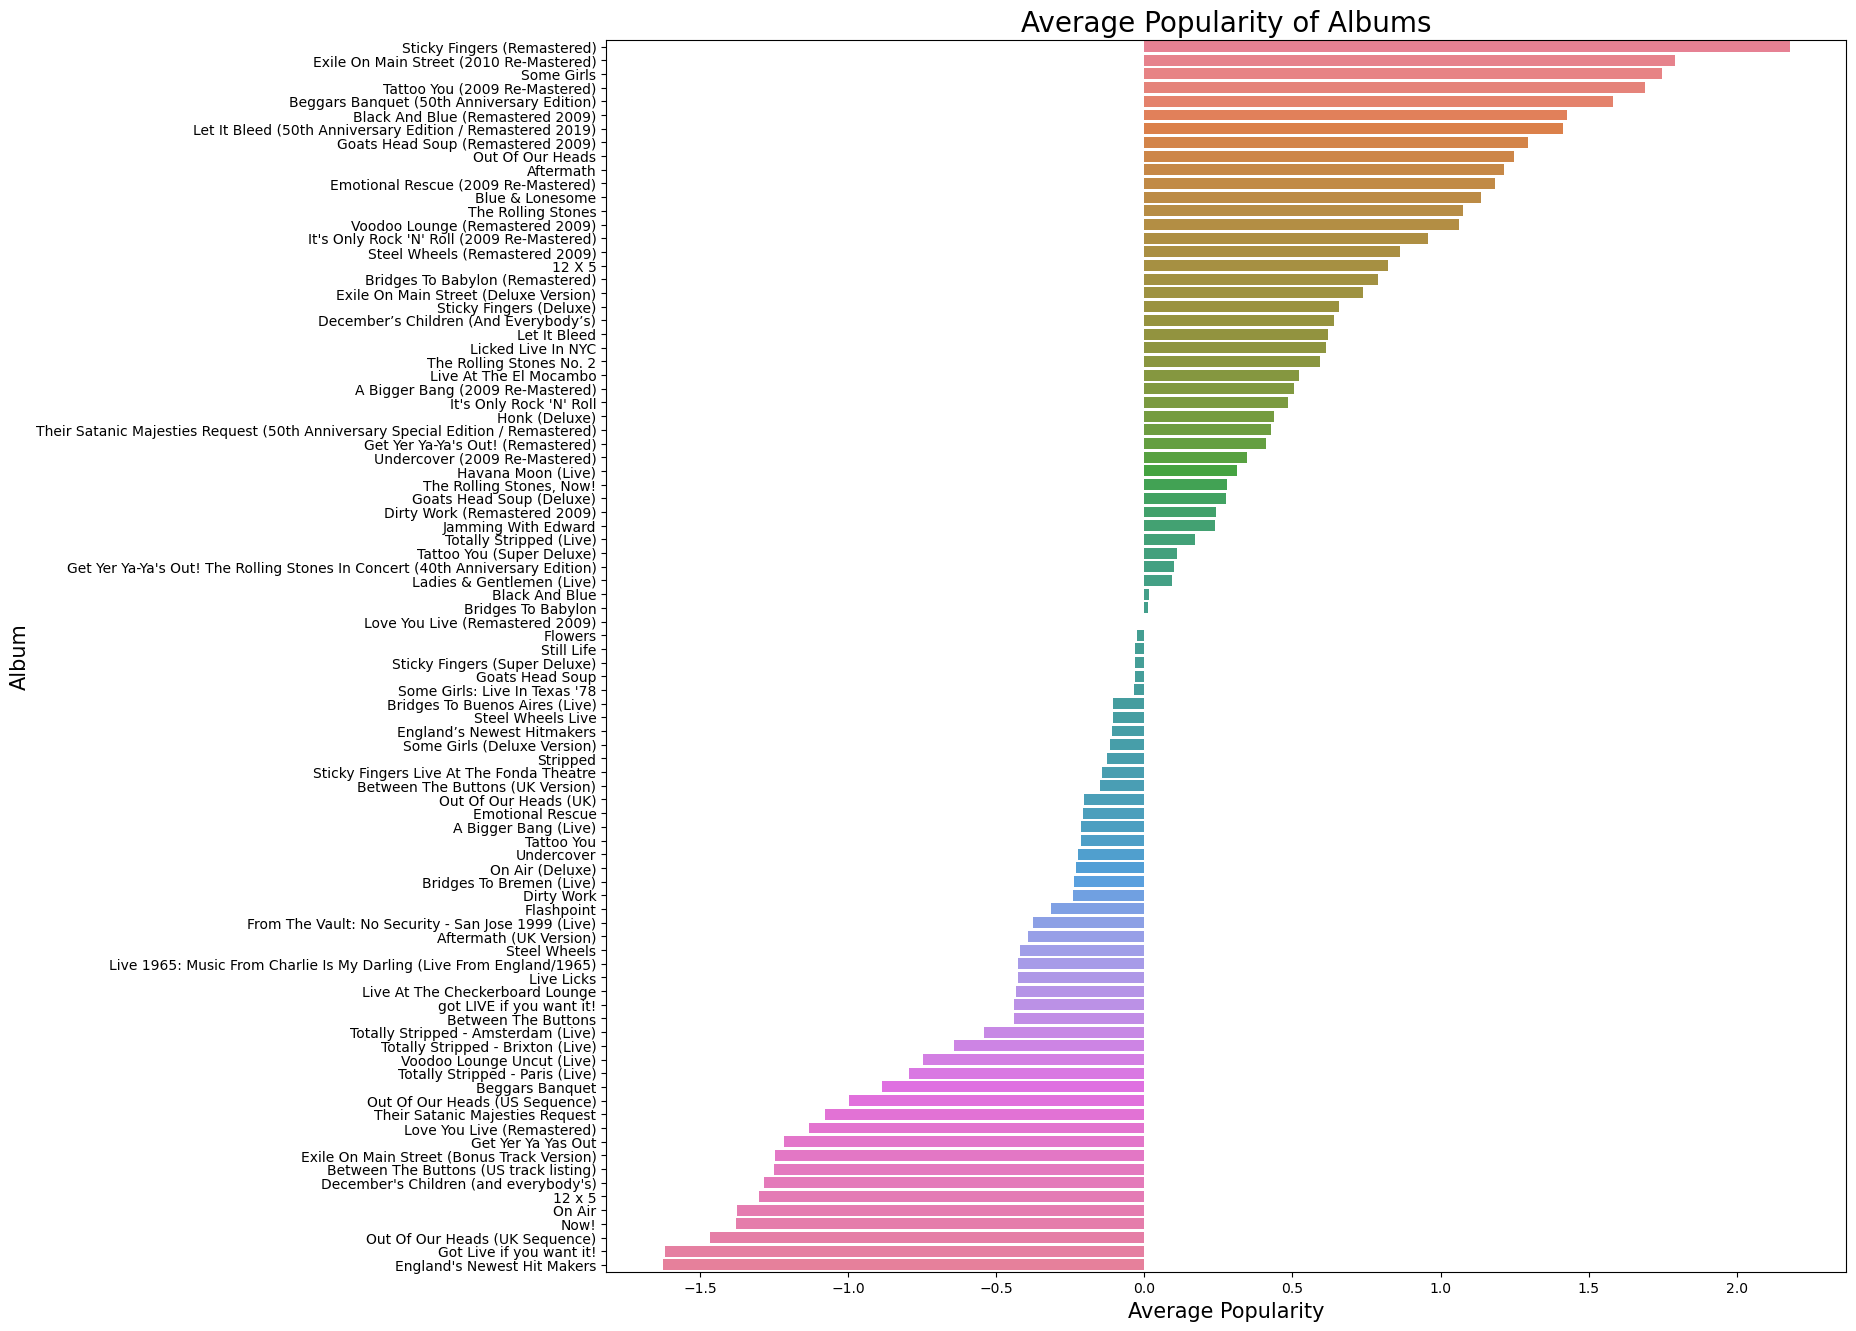

In [17]:
# Plotting the average popularity of albums
plt.figure(figsize=(16,16))
sns.barplot(x=album_popularity.values, y=album_popularity.index, hue = album_popularity.index)
plt.title('Average Popularity of Albums', fontsize = 20)
plt.xlabel('Average Popularity', fontsize = 15)
plt.ylabel('Album', fontsize = 15)
plt.show()

In [18]:
# Identify the two albums with the most popular songs
top_two_albums = album_popularity.head(2)
print(f"The top two albums recommended based on the number of popular songs are : \n{top_two_albums}")

The top two albums recommended based on the number of popular songs are : 
album
Sticky Fingers (Remastered)                2.178938
Exile On Main Street (2010 Re-Mastered)    1.792693
Name: popularity, dtype: float64


## b. Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

<Figure size 1000x800 with 0 Axes>

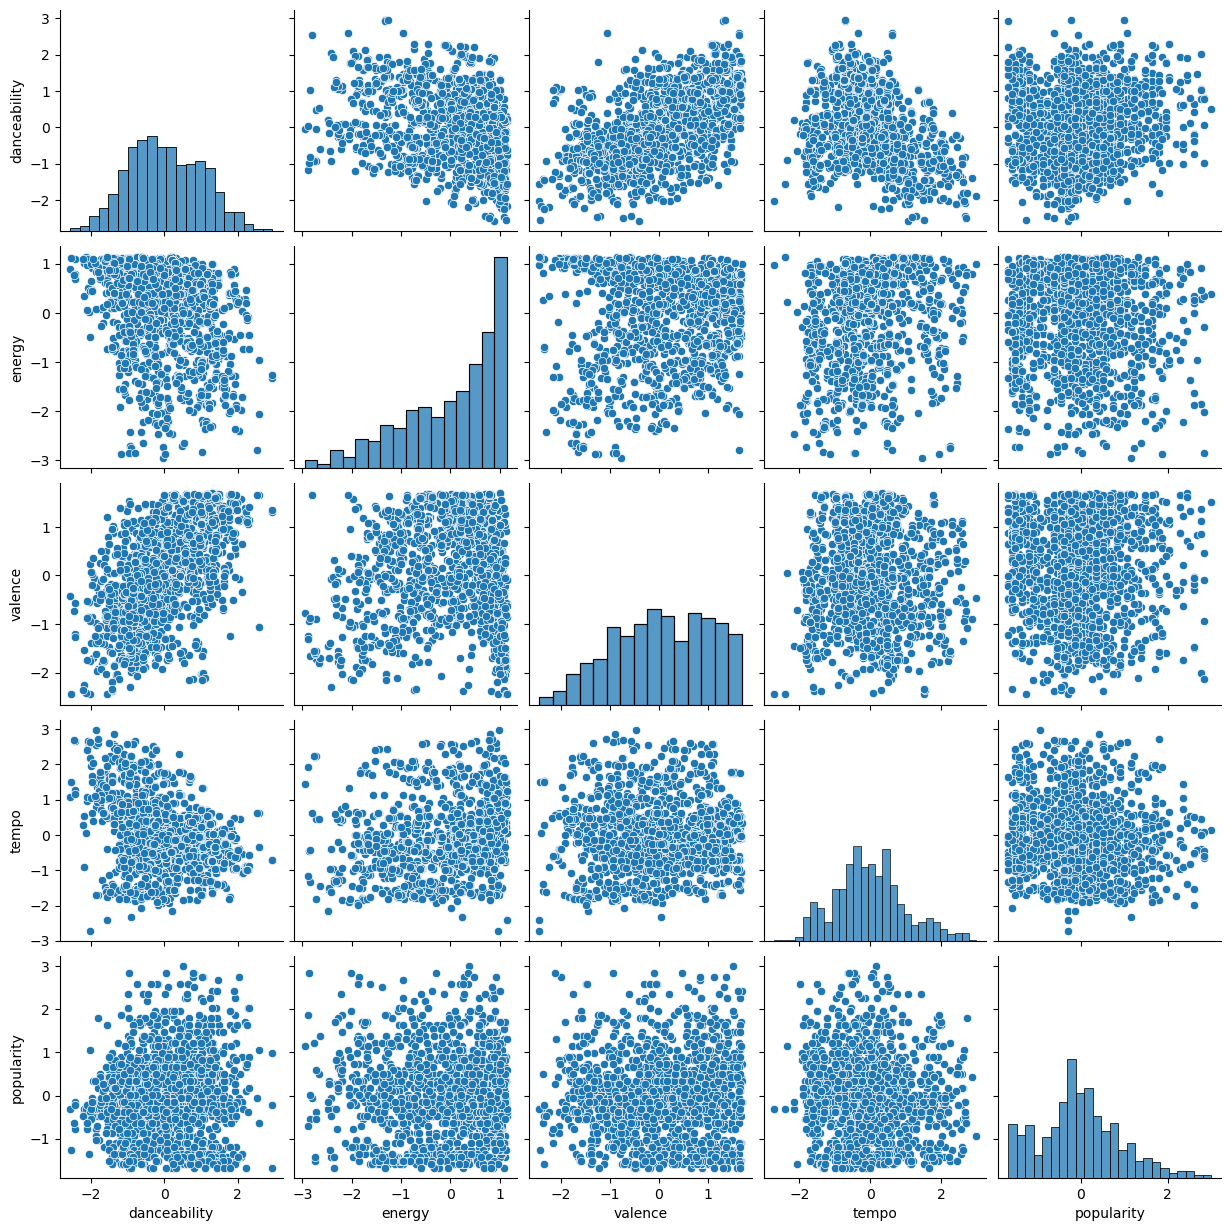

In [19]:
# Pairplot to visualize relationships between features
plt.figure(figsize=(10,8))
sns.pairplot(df[['danceability','energy', 'valence', 'tempo', 'popularity']])

In [20]:
# Correlation matrix

# Create a dataframe of all numeric columns
df_numeric = df[numeric_cols].copy()

# Check for non-numeric values in numeric columns and convert them if necessary
for col in df_numeric.columns:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')

# Drop rows with NaN values that may have resulted from conversion issues
df_numeric = df_numeric.dropna()

# Generate the correlation matrix
corr_matrix = df_numeric.corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
corr_matrix


Correlation Matrix:


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
acousticness,1.000000,0.081612,-0.363625,0.046211,-0.112355,-0.200142,-0.119025,-0.173219,-0.115866,0.105469,0.106276
danceability,0.081612,1.000000,-0.312081,-0.024561,-0.510922,-0.297296,-0.342865,-0.318273,0.535234,0.099812,-0.233560
energy,-0.363625,-0.312081,1.000000,0.122720,0.503274,0.694790,0.479397,0.215697,0.046665,-0.051860,0.156284
instrumentalness,0.046211,-0.024561,0.122720,1.000000,0.001311,0.050053,-0.015671,0.029341,0.127868,0.011834,-0.138705
liveness,-0.112355,-0.510922,0.503274,0.001311,1.000000,0.340895,0.429659,0.113494,-0.341884,-0.180020,0.313684
loudness,-0.200142,-0.297296,0.694790,0.050053,0.340895,1.000000,0.292776,0.112611,-0.088728,0.167845,0.236534
speechiness,-0.119025,-0.342865,0.479397,-0.015671,0.429659,0.292776,1.000000,0.247941,-0.385720,-0.135269,0.132173
tempo,-0.173219,-0.318273,0.215697,0.029341,0.113494,0.112611,0.247941,1.000000,0.009591,-0.063744,-0.038236
valence,-0.115866,0.535234,0.046665,0.127868,-0.341884,-0.088728,-0.385720,0.009591,1.000000,0.035501,-0.302516
popularity,0.105469,0.099812,-0.051860,0.011834,-0.180020,0.167845,-0.135269,-0.063744,0.035501,1.000000,0.116511


Text(0.5, 1.0, 'Correlation Matrix of Song Features')

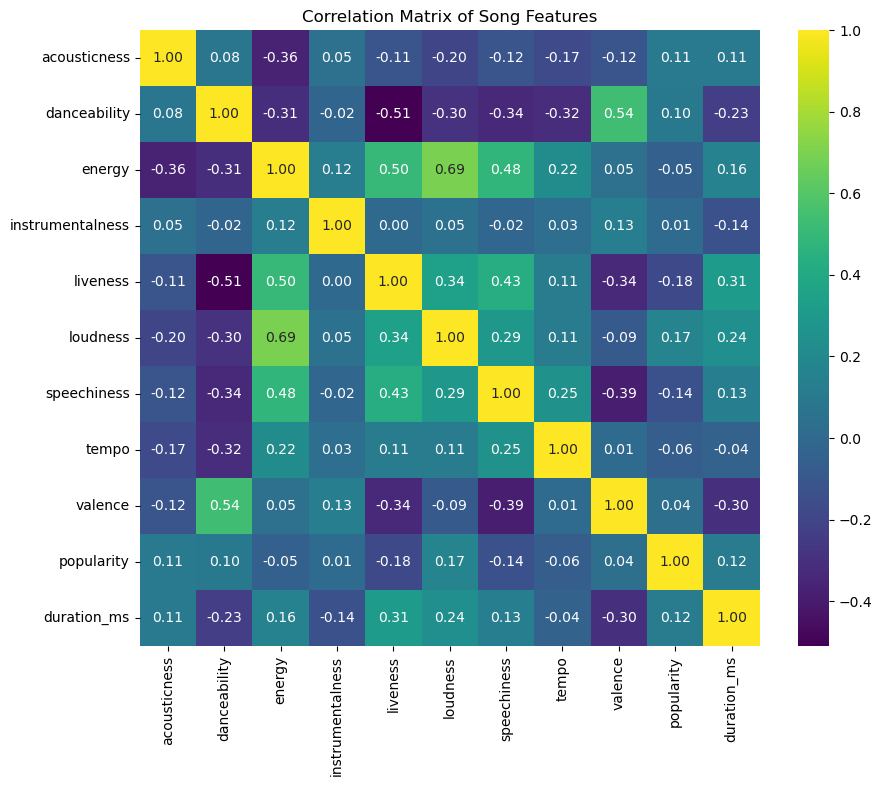

In [21]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Matrix of Song Features')

## c. Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved

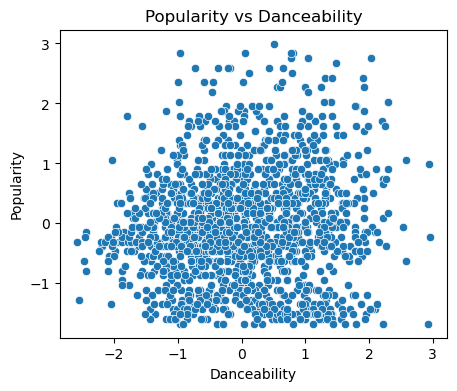

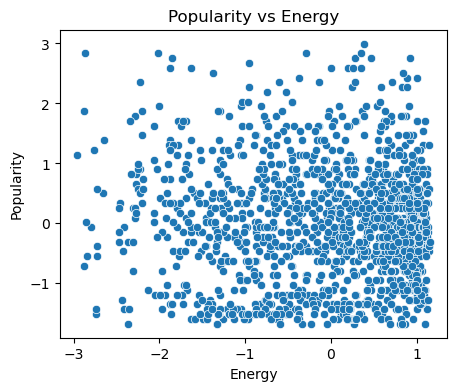

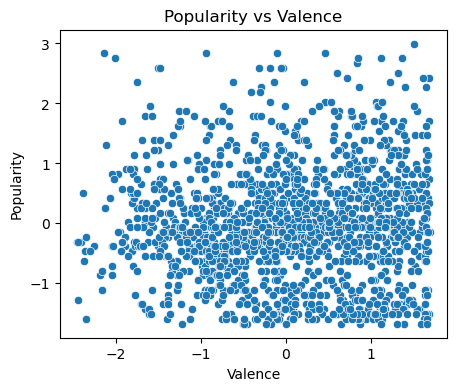

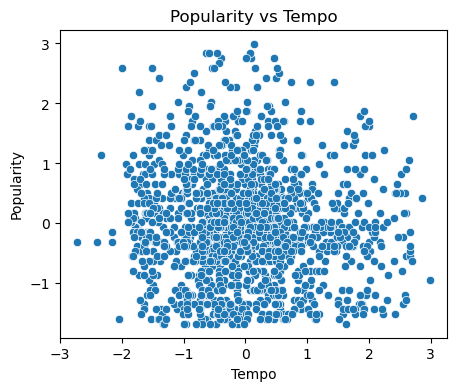

In [22]:
# Scatter plot of popularity vs other features
features = ['danceability', 'energy', 'valence', 'tempo']
for feature in features:
    plt.figure(figsize=(5,4))
    sns.scatterplot(data=df, x=feature, y='popularity')
    plt.title(f'Popularity vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Popularity')

## d. Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1508 entries, 1 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1508 non-null   object        
 1   album             1508 non-null   object        
 2   release_date      1508 non-null   datetime64[ns]
 3   track_number      1508 non-null   int64         
 4   id                1508 non-null   object        
 5   uri               1508 non-null   object        
 6   acousticness      1508 non-null   float64       
 7   danceability      1508 non-null   float64       
 8   energy            1508 non-null   float64       
 9   instrumentalness  1508 non-null   float64       
 10  liveness          1508 non-null   float64       
 11  loudness          1508 non-null   float64       
 12  speechiness       1508 non-null   float64       
 13  tempo             1508 non-null   float64       
 14  valence           1508 non-nu

Explained Variance: [0.33712938 0.17001133]


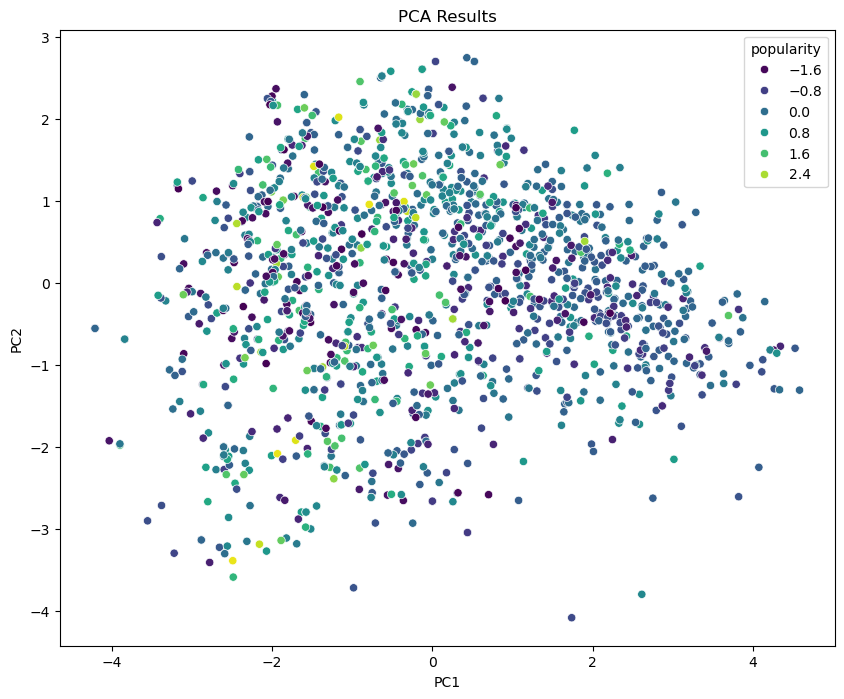

In [24]:
# Selecting numeric features for PCA
numeric_features = df.select_dtypes(include=['float64']).drop(columns=['popularity', 'duration_ms'])

# Standardizing the features
ss = StandardScaler()
scaled_features = ss.fit_transform(numeric_features)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance: {explained_variance}')

# Adding principal components to the dataframe
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# Plotting the PCA results
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', data=df, hue='popularity', palette='viridis')
plt.title('PCA Results')
plt.show()

## Observations

First Principal Component (PC1): The first component explains 33.71% of the variance in the data. This suggests that a significant portion, but not the majority, of the data's variability is captured by this single dimension.

Second Principal Component (PC2): The second component explains an additional 17.00% of the variance. Together, the first two components explain 50.71% of the total variance in the dataset.

# 4. Perform cluster analysis

## a. Identify the right number of clusters

In [25]:
# Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
sse

[13572.000000000005,
 10379.61866614351,
 9009.023505411202,
 8231.974372777133,
 7684.571629105978,
 7078.252442426841,
 6565.267374660752,
 6273.857362123389,
 5943.522921597404,
 5751.424282206849]

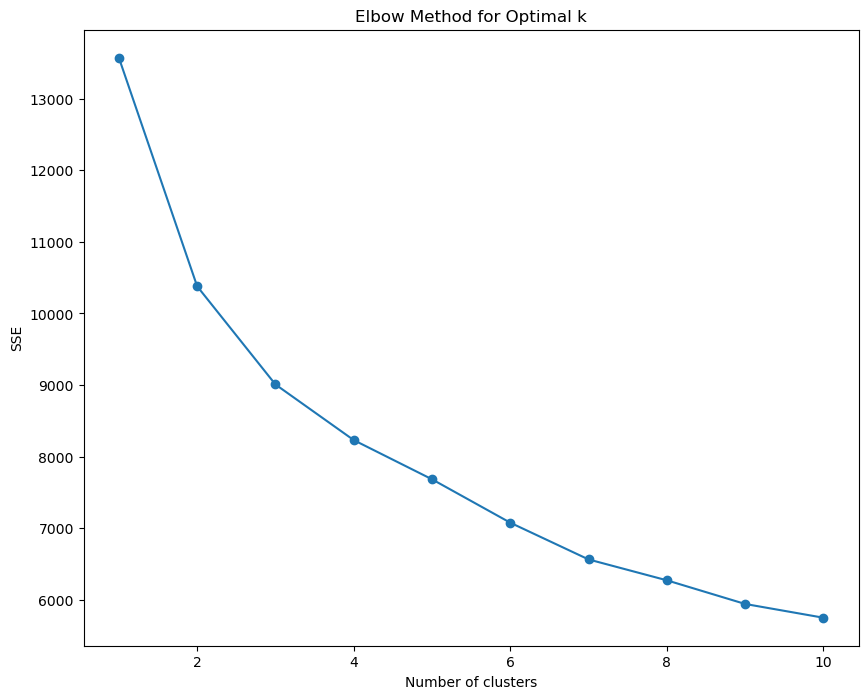

In [26]:
# Plotting the Elbow Curve
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

The right number of clusters = 3

## b. Use appropriate clustering algorithms

In [49]:
df_numeric = df[numeric_cols]

# Standardize the data
ss = StandardScaler()
df_scaled = ss.fit_transform(df_numeric)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

## c. Define each cluster based on the features

In [50]:
# Aggregate by cluster and calculate the mean of numeric features
cluster_summary = df.groupby('cluster')[numeric_cols].mean()

# Display cluster summary
cluster_summary

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
cluster,,,,,,,,,,,
0,-0.291367,0.572144,0.252495,0.304961,-0.504799,0.222570,-0.386350,-0.128698,0.861351,0.210863,-0.327301
1,0.658509,0.293250,-1.175302,-0.296077,-0.606540,-0.818434,-0.488755,-0.365010,-0.257212,-0.030203,-0.193955
2,-0.297948,-0.743437,0.733825,-0.069041,0.954956,0.543294,0.553829,0.383305,-0.540854,-0.260850,0.249459


In [51]:
# Get the most common album for each cluster
most_common_album = df.groupby('cluster')['album'].agg(lambda x: x.mode()[0])

# Combine numeric summary with the most common album
cluster_summary['most_common_album'] = most_common_album

# Display combined cluster summary
cluster_summary

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,most_common_album
cluster,,,,,,,,,,,,
0,-0.291367,0.572144,0.252495,0.304961,-0.504799,0.222570,-0.386350,-0.128698,0.861351,0.210863,-0.327301,Honk (Deluxe)
1,0.658509,0.293250,-1.175302,-0.296077,-0.606540,-0.818434,-0.488755,-0.365010,-0.257212,-0.030203,-0.193955,Aftermath (UK Version)
2,-0.297948,-0.743437,0.733825,-0.069041,0.954956,0.543294,0.553829,0.383305,-0.540854,-0.260850,0.249459,Voodoo Lounge Uncut (Live)


<Axes: xlabel='danceability', ylabel='popularity'>

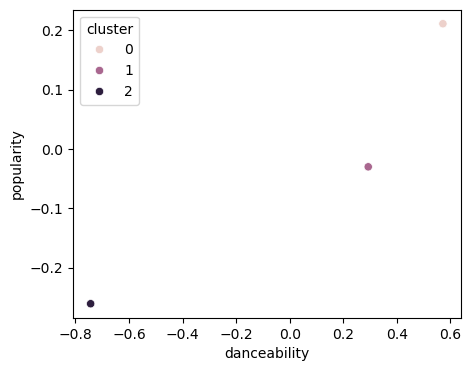

In [52]:
plt.figure(figsize = (5,4))
sns.scatterplot(x ='danceability' , y = 'popularity', hue = 'cluster', data = cluster_summary)

## Cluster Characteristics:

Cluster 0: Lower acousticness, higher danceability, moderate energy and higher popularity. Common album: "Honk (Deluxe)."

Cluster 1: Higher acousticness, moderate danceability, lower energy and moderate popularity. Common album: "Aftermath (Uk Version)."

Cluster 2: Lower acousticness, lower danceability, higher energy, lower popularity. Common album: "Voodoo Lounge Uncut (Live)."